# Peripheral Analyzer
This notebook compares the different audio encoders in relation to the cochlea. As such, these algorithms will only convert the audio to spectral representations and avoid the echoic memory issue for now. We will compare how these raw representations differ in terms of time taken to complete on a per file basis as well as information gain using them.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import librosa as libr
import librosa.display as ldis
global_figsize = (16,6)

# Reading Database
Using pandas to read in the database for audio loading

In [2]:
dataset = pd.read_csv('../ESC-50/meta/esc50.csv')
classes = [None] * 50
h_classes = ['Human & Animal', 'Interacting Materials']
mapping = {'dog': 0,'rooster': 0,'pig': 0,'cow': 0,'frog': 0,'cat': 0,'hen': 0,
            'insects': 0,'sheep': 0,'crow': 0,'rain': 1,'sea_waves': 1,'crackling_fire': 1,
            'crickets': 0,'chirping_birds': 0,'water_drops': 1,'wind': 1,'pouring_water': 1,
            'toilet_flush': 1,'thunderstorm': 1,'crying_baby': 0,'sneezing': 0,'clapping': 0,
            'breathing': 0,'coughing': 0,'footsteps': 1,'laughing': 0,'brushing_teeth': 1,
            'snoring': 0,'drinking_sipping': 1,'door_wood_knock': 1,'mouse_click': 1,
            'keyboard_typing': 1,'door_wood_creaks': 1,'can_opening': 1,'washing_machine': 1,
            'vacuum_cleaner': 1,'clock_alarm': 1,'clock_tick': 1,'glass_breaking':1,'helicopter': 1,
            'chainsaw': 1,'siren': 1,'car_horn': 1,'engine': 1,'train': 1,'church_bells': 1,
            'airplane': 1,'fireworks': 1,'hand_saw': 1,
            }
# dataset = dataset[dataset['esc10'] == True]

In [3]:
dataset['h_target'] = None
for index, row in dataset.iterrows():
    target = row['target']
    classes[target] = row['category']
    dataset.loc[index, 'h_target'] = mapping[row['category']]

In [4]:
dataset.head()

filename  fold  target        category  esc10  src_file take  \
0   1-100032-A-0.wav     1       0             dog   True    100032    A   
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A   
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A   
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B   
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A   

   h_target  
0         0  
1         0  
2         1  
3         1  
4         1

In [5]:
samples = dataset.sample(2)
samples.head()

filename  fold  target         category  esc10  src_file take  \
415  2-102568-A-35.wav     2      35  washing_machine  False    102568    A   
31    1-12654-A-15.wav     1      15      water_drops  False     12654    A   

     h_target  
415         1  
31          1

## Reading in Audio

In [6]:
y0, sr0 = libr.core.load('../ESC-50/audio/' + samples.iloc[0]['filename'], sr=16000, mono=True)
y1, sr1 = libr.core.load('../ESC-50/audio/' + samples.iloc[1]['filename'], sr=16000, mono=True)

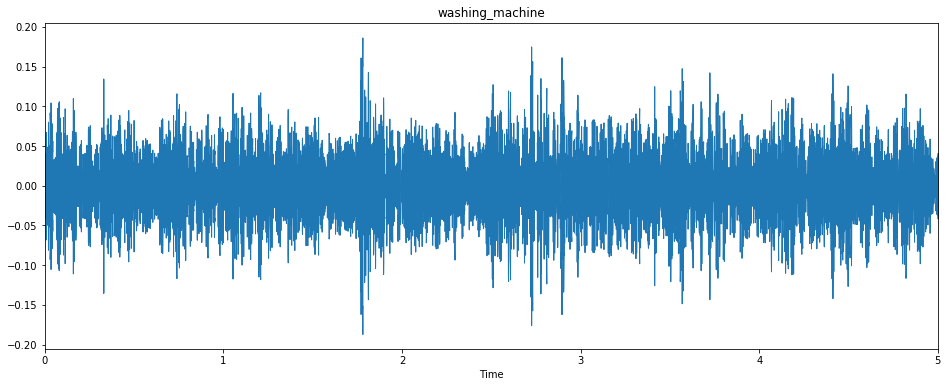

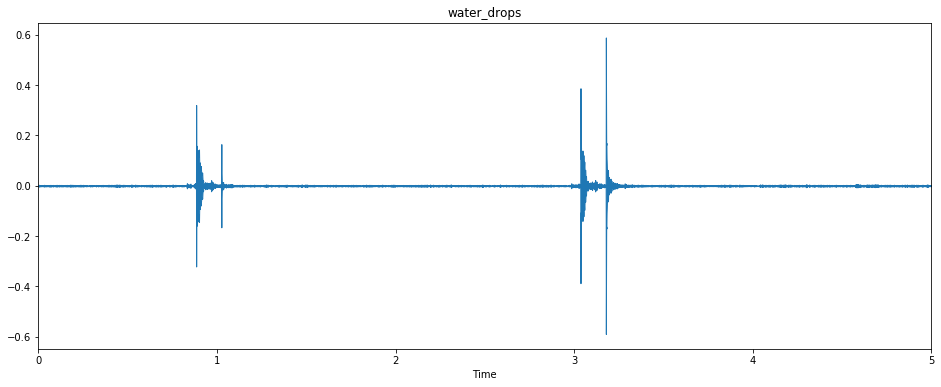

In [7]:
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[0]['category'])
ldis.waveplot(y0, sr0)
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[1]['category'])
ldis.waveplot(y1, sr1)

# Lowpass Filter

In [8]:
import scipy.signal as signal

def lowpass(y, N=3, Wn=0.5):
    # First, design the Buterworth filter
    N  = 3    # Filter order
    Wn = 0.5 # Cutoff frequency
    B, A = signal.butter(N, Wn, output='ba')
    return signal.filtfilt(B,A, y)

In [9]:
y0 = lowpass(y0)
y1 = lowpass(y1)

/usr/local/lib/python3.5/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


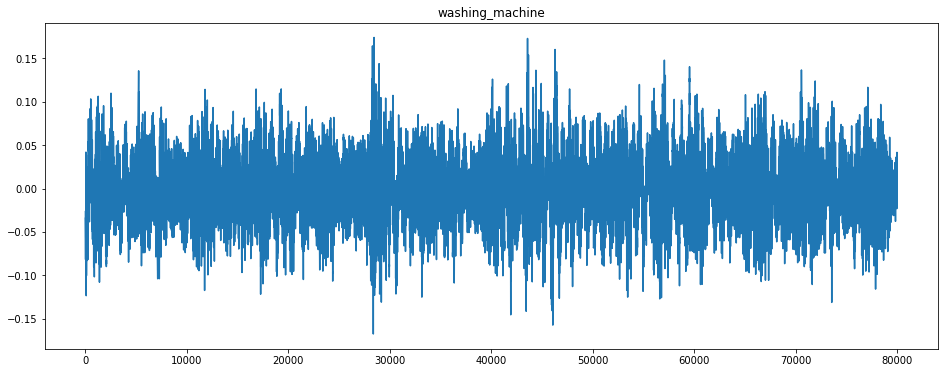

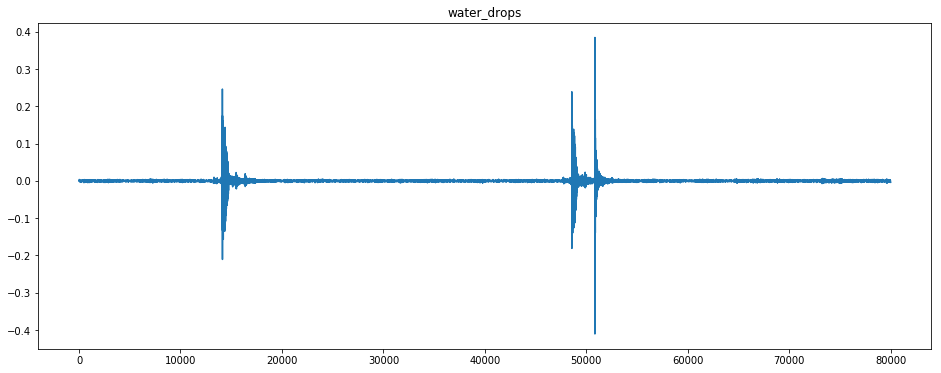

In [10]:
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[0]['category'])
plt.plot(y0)
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[1]['category'])
plt.plot(y1)

## Split
Split signal into non-silent intervals

In [11]:
y0 = [y0[i[0]:i[1]] for i in libr.effects.split(y0, frame_length=512, hop_length=256, top_db=30)]
y1 = [y1[i[0]:i[1]] for i in libr.effects.split(y1, frame_length=512, hop_length=256, top_db=30)]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


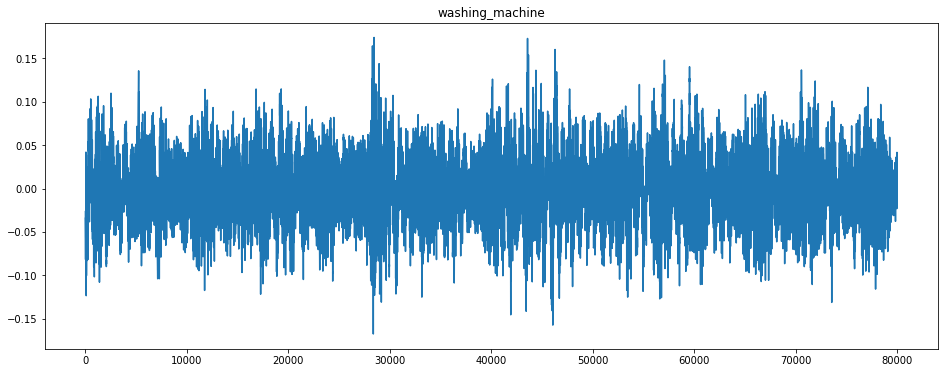

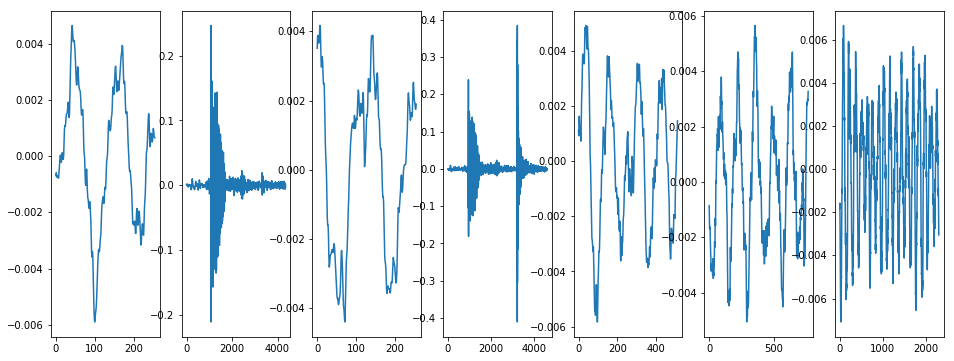

In [12]:
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[0]['category'])
for i in range(0, len(y0)):
    ax=plt.subplot(1,len(y0),i+1)
    plt.plot(y0[i])

plt.figure(figsize=global_figsize)
plt.title(samples.iloc[1]['category'])
for i in range(0, len(y1)):
    ax=plt.subplot(1,len(y1),i+1)
    plt.plot(y1[i])

## Normalize Signal
Normalize to between 0 and 1

In [13]:
for i in range(0, len(y0)):
    y0[i] /= np.max(y0[i], axis=0)
for i in range(0, len(y1)):
    y1[i] /= np.max(y1[i], axis=0)

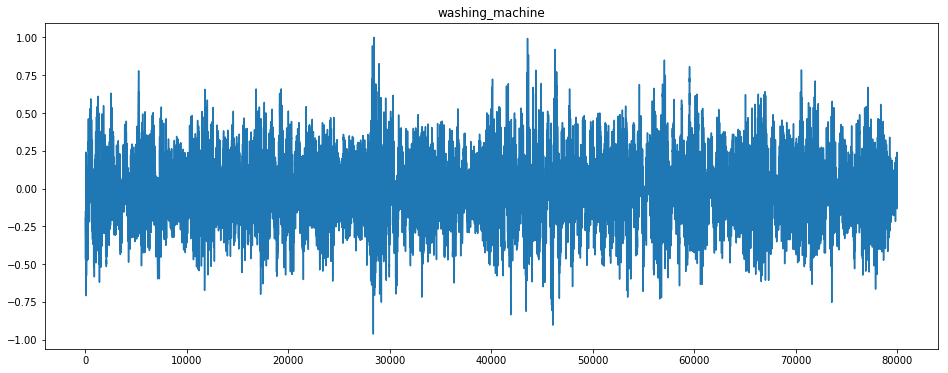

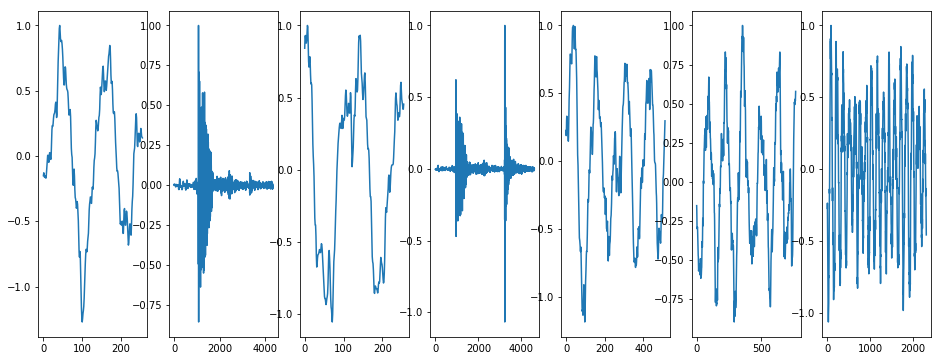

In [14]:
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[0]['category'])
for i in range(0, len(y0)):
    ax=plt.subplot(1,len(y0),i+1)
    plt.plot(y0[i])

plt.figure(figsize=global_figsize)
plt.title(samples.iloc[1]['category'])
for i in range(0, len(y1)):
    ax=plt.subplot(1,len(y1),i+1)
    plt.plot(y1[i])

### Onset Based Splitting
First needs spectrogram representation

In [15]:
# def splitter(sr=22050, y=None, S=None, hop_length=512, backtrack=True):
#     if S is None:
#         onset_samples = libr.onset.onset_detect(y, units='samples', sr=sr, hop_length=hop_length, backtrack=backtrack)
#     else:
#         onset_strength = libr.onset.onset_strength(S=S, sr=sr)
# #         print(onset_strength)
#         times = libr.frames_to_time(np.arange(len(onset_strength)), sr=sr)
# #         print(times)
#         onset_samples = libr.onset.onset_detect(onset_envelope=onset_strength, units='frames', sr=sr, hop_length=hop_length, backtrack=backtrack)
#     return onset_samples

In [16]:
# y0_orig = []
# t=0
# for i in splitter(y=y0, sr=sr0, hop_length=1024):
#     if y0[t:i].size:
#         y0_orig.append(y0[t:i])
#     t=i

# y1_orig = []
# t=0
# for i in splitter(y=y1, sr=sr1, hop_length=1024):
#     if y1[t:i].size:
#         y1_orig.append(y1[t:i])
#     t=i

In [17]:
# plt.figure(figsize=global_figsize)
# plt.title(samples.iloc[0]['category'])
# for i in range(0, len(y0_orig)):
#     ax=plt.subplot(1,len(y0_orig),i+1)
#     ldis.waveplot(y0_orig[i], sr0)

# plt.figure(figsize=global_figsize)
# plt.title(samples.iloc[1]['category'])
# for i in range(0, len(y1_orig)):
#     ax=plt.subplot(1,len(y1_orig),i+1)
#     ldis.waveplot(y1_orig[i], sr1)

## Halfwave Rectification
Only keep positive parts of signal

In [18]:
for i in range(0, len(y0)):
    y0[i] = y0[i].clip(min=0)
for i in range(0, len(y1)):
    y1[i] = y1[i].clip(min=0)

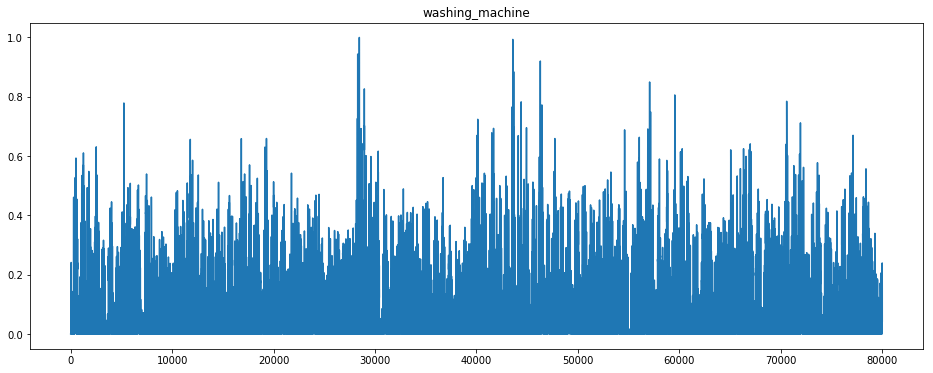

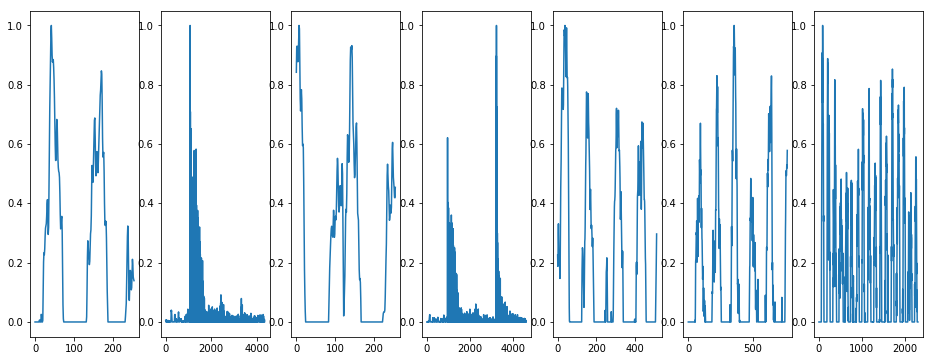

In [19]:
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[0]['category'])
for i in range(0, len(y0)):
    ax=plt.subplot(1,len(y0),i+1)
    plt.plot(y0[i])

plt.figure(figsize=global_figsize)
plt.title(samples.iloc[1]['category'])
for i in range(0, len(y1)):
    ax=plt.subplot(1,len(y1),i+1)
    plt.plot(y1[i])

## Filterbanks
A number of filterbanks are used throughout audio analytics and here we will compare them.

In [20]:
for i in range(0, len(y0)):
    y0[i] = y0[i][np.newaxis, :]
for i in range(0, len(y1)):
    y1[i] = y1[i][np.newaxis, :]

In [21]:
import keras
import kapre
from keras.models import Sequential
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.filterbank import Filterbank
from kapre.utils import Normalization2D

Using TensorFlow backend.


In [22]:
def mel_spec_model(input_shape, n_mels, power_melgram, decibel_gram, sr, n_dft=128):
    model = Sequential()
    model.add(Melspectrogram(
        sr=sr,
        n_dft=n_dft,
        n_mels=n_mels,
        power_melgram=power_melgram,
        return_decibel_melgram = decibel_gram,
        input_shape=input_shape,
        trainable_fb=False
    ))
    model.add(Normalization2D(str_axis='channel'))
    return model

def spec_model(input_shape, decibel_gram):
    model = Sequential()
    model.add(Spectrogram(
        return_decibel_spectrogram = decibel_gram,
        input_shape=input_shape,
        n_dft=128
    ))
    model.add(Normalization2D(str_axis='channel'))
    return model

def check_model(model, debug=False):
    if debug:
        model.summary(line_length=80, positions=[.33, .65, .8, 1.])

    batch_input_shape = (2,) + model.input_shape[1:]
    batch_output_shape = (2,) + model.output_shape[1:]
    model.compile('sgd', 'mse')
    model.fit(np.random.uniform(size=batch_input_shape), np.random.uniform(size=batch_output_shape), epochs=1)

def visualise_model(model, src, sr, kind='linear', logam=False):
    n_ch, nsp_src = model.input_shape[1:]
    print(src.shape)
    src = src[:nsp_src]
    src_batch = src[np.newaxis, :]
    pred = model.predict(x=src_batch)
    if keras.backend.image_data_format == 'channels_first':
        result = pred[0, 0]
    else:
        result = pred[0, :, :, 0]
    ldis.specshow(result, y_axis='linear', fmin=800, fmax=8000, sr=sr)

def eval_single_model(model, src, sr):
    n_ch, nsp_src = model.input_shape[1:]
    src = src[:nsp_src]
    src_batch = src[np.newaxis, :]
    pred = model.predict(x=src_batch)
    if keras.backend.image_data_format == 'channels_first':
        result = pred[0, 0]
    else:
        result = pred[0, :, :, 0]
    return result
    
def evaluate_model(model, c_data):
    pred = model.predict(x=c_data)
    if keras.backend.image_data_format == 'channels_first':
        result = pred[0, 0]
    else:
        result = pred[:, :, :, 0]
#         result = np.swapaxes(result, 1, 2)
#         print(result.shape)
    return result.clip(min=0)

### Unfiltered Spectrum

Epoch 1/1
2/2 [==============================] - 0s 54ms/step - loss: 1.3333
(1, 80000)
Epoch 1/1
2/2 [==============================] - 0s 43ms/step - loss: 1.3748
(1, 256)
Epoch 1/1
2/2 [==============================] - 0s 54ms/step - loss: 1.3406
(1, 4352)
Epoch 1/1
2/2 [==============================] - 0s 57ms/step - loss: 1.3263
(1, 256)
Epoch 1/1
2/2 [==============================] - 0s 62ms/step - loss: 1.3453
(1, 4608)
Epoch 1/1
2/2 [==============================] - 0s 74ms/step - loss: 1.3513
(1, 512)
Epoch 1/1
2/2 [==============================] - 0s 75ms/step - loss: 1.3500
(1, 768)
Epoch 1/1
2/2 [==============================] - 0s 74ms/step - loss: 1.3340
(1, 2304)


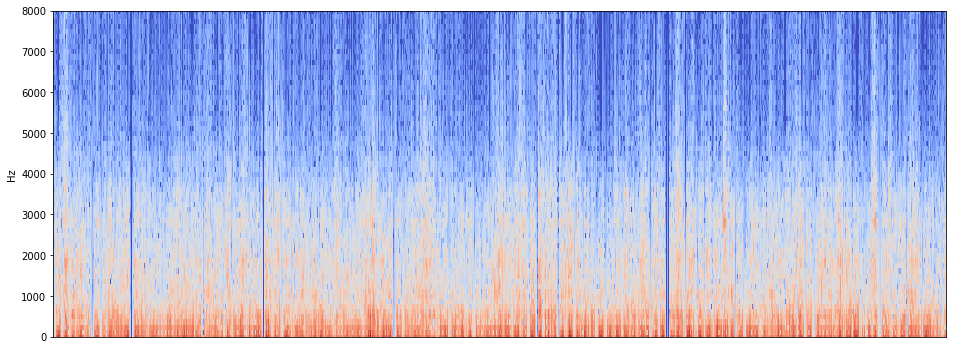

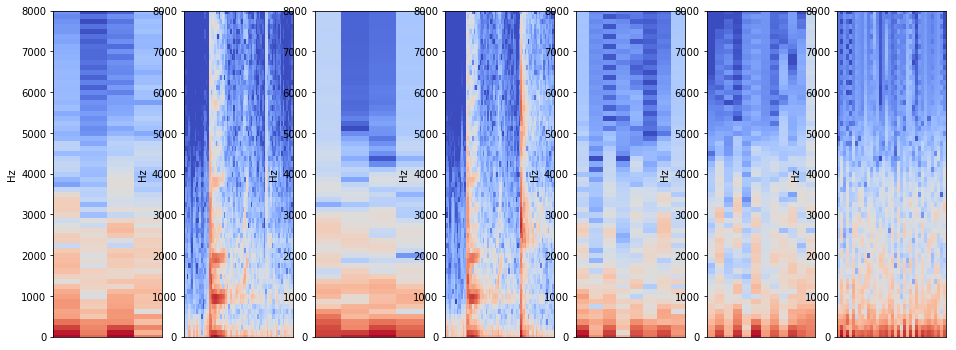

In [23]:
plt.figure(figsize=global_figsize)
for i in range(0, len(y0)):
    model = spec_model(input_shape=y0[i].shape, decibel_gram=True)
    check_model(model)
    ax=plt.subplot(1,len(y0),i+1)
    visualise_model(model, sr=sr0, src=y0[i])

plt.figure(figsize=global_figsize)
for i in range(0, len(y1)):
    model = spec_model(input_shape=y1[i].shape, decibel_gram=True)
    check_model(model)
    ax=plt.subplot(1,len(y1),i+1)
    visualise_model(model, sr=sr1, src=y1[i])

### Mel Filter
The popular mel filterbank

/usr/local/lib/python3.5/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


Epoch 1/1
2/2 [==============================] - 0s 95ms/step - loss: 1.3333
(1, 80000)


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Epoch 1/1
2/2 [==============================] - 0s 86ms/step - loss: 1.3522
(1, 256)
Epoch 1/1
2/2 [==============================] - 0s 104ms/step - loss: 1.3278
(1, 4352)
Epoch 1/1
2/2 [==============================] - 0s 109ms/step - loss: 1.3177
(1, 256)
Epoch 1/1
2/2 [==============================] - 0s 116ms/step - loss: 1.3321
(1, 4608)
Epoch 1/1
2/2 [==============================] - 0s 130ms/step - loss: 1.3554
(1, 512)
Epoch 1/1
2/2 [==============================] - 0s 136ms/step - loss: 1.3260
(1, 768)
Epoch 1/1
2/2 [==============================] - 0s 146ms/step - loss: 1.3345
(1, 2304)


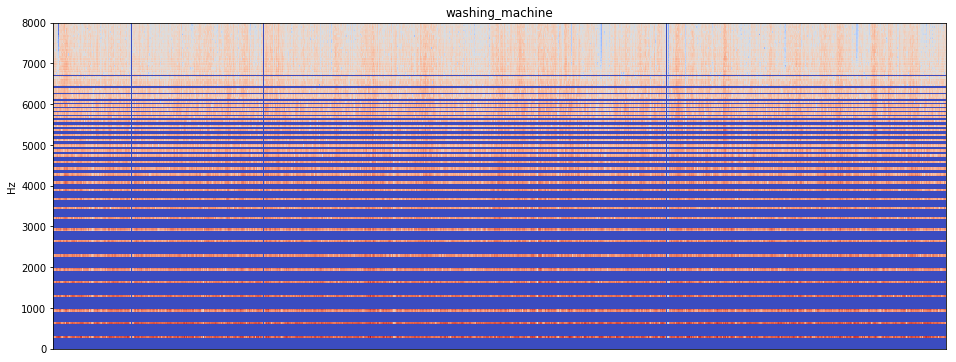

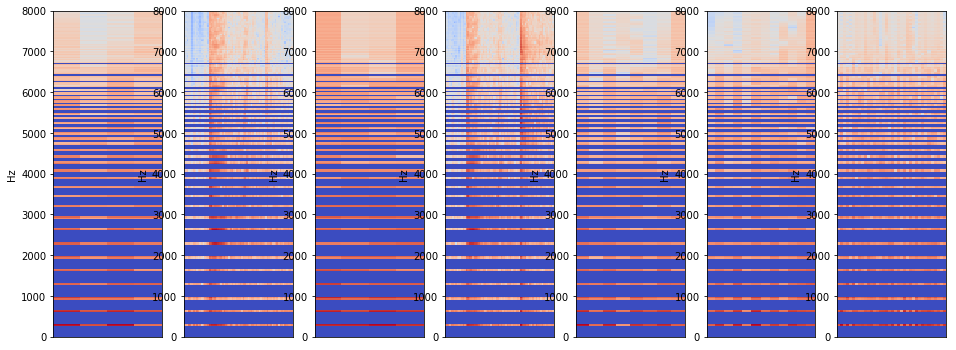

In [24]:
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[0]['category'])
n_mels = 256
for i in range(0, len(y0)):
    mel_model = mel_spec_model(y0[i].shape, n_mels, True, True, sr0)
    check_model(mel_model)
    ax=plt.subplot(1,len(y0),i+1)
    visualise_model(mel_model, y0[i], sr=sr0, kind='mel')
    
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[1]['category'])
for i in range(0, len(y1)):
    mel_model = mel_spec_model(y1[i].shape, n_mels, True, True, sr1)
    check_model(mel_model)
    ax=plt.subplot(1,len(y1),i+1)
    visualise_model(mel_model, y1[i], sr=sr1, kind='mel')

### Gammatone 
For more humanlike hearing

In [25]:
from gammatone import gtgram, fftweight, filters
import matplotlib

In [26]:
class ERBFormatter(matplotlib.ticker.EngFormatter):
    """
    Axis formatter for gammatone filterbank analysis. This formatter calculates
    the ERB spaced frequencies used for analysis, and renders them similarly to
    the engineering axis formatter.
    The scale is changed so that `[0, 1]` corresponds to ERB spaced frequencies
    from ``high_freq`` to ``low_freq`` (note the reversal). It should be used
    with ``imshow`` where the ``extent`` argument is ``[a, b, 1, 0]`` (again,
    note the inversion).
    """

    def __init__(self, low_freq, high_freq, *args, **kwargs):
        """
        Creates a new :class ERBFormatter: for use with ``matplotlib`` plots.
        Note that this class does not supply the ``units`` or ``places``
        arguments; typically these would be ``'Hz'`` and ``0``.
        :param low_freq: the low end of the gammatone filterbank frequency range
        :param high_freq: the high end of the gammatone filterbank frequency
          range
        """
        self.low_freq = low_freq
        self.high_freq = high_freq
        super().__init__(*args, **kwargs)

    def _erb_axis_scale(self, fraction):
        return filters.erb_point(self.low_freq, self.high_freq, fraction)

    def __call__(self, val, pos=None):
        newval = self._erb_axis_scale(val)
        return super().__call__(newval, pos)

def gtgram_plot(
        gtgram_function,
        axes, x, fs, window_time, 
        hop_time, channels, f_min
        ):
    """
    Plots a spectrogram-like time frequency magnitude array based on gammatone
    subband filters.
    :param gtgram_function: A function with signature::
        fft_gtgram(
            wave,
            fs,
            window_time, hop_time,
            channels,
            f_min)
    See :func:`gammatone.gtgram.gtgram` for details of the paramters.
    """
    # Set a nice formatter for the y-axis
    formatter = ERBFormatter(f_min, fs/2, unit='Hz', places=0)
    axes.yaxis.set_major_formatter(formatter)

    # Figure out time axis scaling
    duration = len(x) / fs

    # Calculate 1:1 aspect ratio
    golden = (1 + 5 ** 0.5) / 2
    aspect_ratio = duration/golden

    gtg = gtgram_function(x, fs, window_time, hop_time, channels, f_min)
    Z = np.flipud(20 * np.log10(gtg))

    img = axes.imshow(Z, extent=[0, duration, 1, 0], aspect=aspect_ratio)

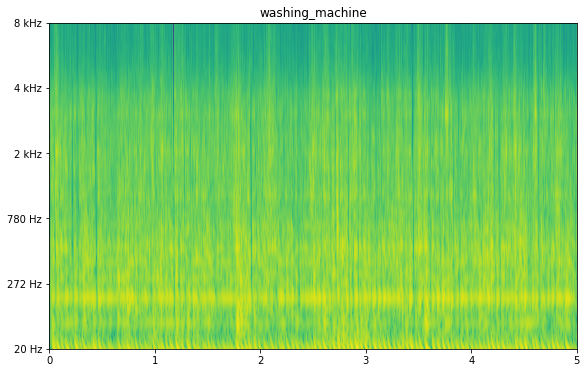

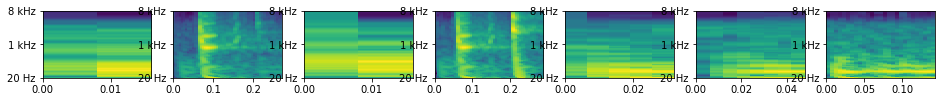

In [27]:
plt.figure(figsize=global_figsize)
plt.title(samples.iloc[0]['category'])
for i in range(0, len(y0)):
    ax=plt.subplot(1,len(y0),i+1)
    gtgram_plot(gtgram.gtgram, ax, y0[i][0][:], sr0, 0.01, 0.005, 2048, 20)

plt.figure(figsize=global_figsize)
plt.title(samples.iloc[1]['category'])
for i in range(0, len(y1)):
    ax=plt.subplot(1,len(y1),i+1)
    gtgram_plot(gtgram.gtgram, ax, y1[i][0][:], sr1, 0.01, 0.005, 2048, 20)

# Full Dataset
Now we get these representations for the whole dataset

## Mel Retreival

In [28]:
silence_split = []

start_t = time.time()
yy = []
for j in range(0,len(dataset)):
    # Load audio with downsample to 16000
    y, sr = libr.core.load('../ESC-50/audio/' + dataset.iloc[j]['filename'], sr=16000, mono=True)
    y = lowpass(y)
    silence_split.append(libr.effects.split(y, frame_length=512, hop_length=256, top_db=30))
    # Normalize signal
    y /= np.max(y, axis=0)
    # Half-wave rectify
    y = y.clip(min=0)
    yy.append(y[np.newaxis, :])

dataset['silence_split'] = silence_split
y = np.array(yy)

/usr/local/lib/python3.5/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [29]:
mel_model = mel_spec_model(y[0].shape, power_melgram=True, decibel_gram=False, sr=sr, n_mels=256, n_dft=1024)
check_model(mel_model)

Epoch 1/1
2/2 [==============================] - 0s 157ms/step - loss: 1.3307


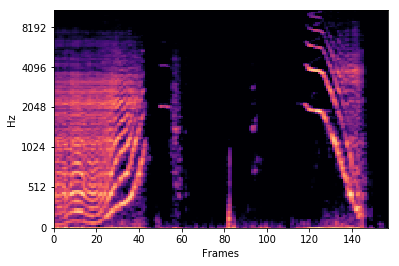

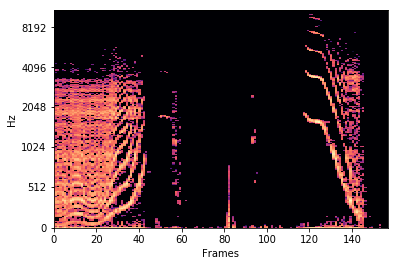

In [30]:
random_doc = 256

mel_spec = libr.feature.melspectrogram(y[random_doc][0])
ldis.specshow(libr.amplitude_to_db(mel_spec, ref=np.max), x_axis='frames', y_axis='mel')
plt.show()
mel_y = evaluate_model(mel_model, y)
ldis.specshow(libr.amplitude_to_db(mel_y[random_doc], ref=np.max), x_axis='frames', y_axis='mel')
plt.show()

In [31]:
dataset['mel'] = mel_y.tolist()
end_t = time.time()

In [32]:
m, s = divmod(end_t-start_t, 60)
h, m = divmod(m, 60)
print('{:f}:{:02f}:{:02f}'.format(h, m, s)) # Python 3

0.000000:6.000000:11.558799


# Feature Extract

In [35]:
# Returns the standard deviation of the data, the mean of the data, and the noise calculated from mean and stddev
def std_dev_mean_noise(data):
    # Standard deviation of data
    stddev = np.std(data, axis=1)
    mean = np.mean(data, axis=1)
    sig_noise = mean / stddev
    ret_dat = np.hstack((stddev, mean, sig_noise))
    return ret_dat

def split_melgram(split, mel_gram, target, h_target):
    split_list = []
    S, phase = libr.magphase(np.array(mel_gram))
    dat = np.array([])
    for (i, frm) in enumerate(split):
        if frm[0] == frm[1]:
            continue
        S_i = S[:,frm[0]:frm[1]]
        mfccs = libr.feature.mfcc(S=S_i, n_mfcc=13)
        dat = np.hstack((
            target,
            h_target,
            std_dev_mean_noise(libr.feature.spectral_centroid(S=S_i)),
            std_dev_mean_noise(libr.feature.spectral_bandwidth(S=S_i)),
            std_dev_mean_noise(libr.feature.spectral_flatness(S=S_i)),
            std_dev_mean_noise(libr.feature.spectral_rolloff(S=S_i)),
            std_dev_mean_noise(libr.feature.rmse(S=S_i)),
            std_dev_mean_noise(libr.feature.mfcc(S=S_i, n_mfcc=13))
#             std_dev_mean_noise(libr.feature.delta(mfccs)),
#             std_dev_mean_noise(libr.feature.delta(mfccs, order=2)),
        ))
        split_list.append(dat)

    return split_list

In [36]:
start_t = time.time()

columns = [
            'target', 'h_target',
            'scen_std', 'scen_mean', 'scen_noise',
            'sband_std', 'sband_mean', 'sband_noise',
            'sflat_std', 'sflat_mean', 'sflat_noise',
            'sroll_std', 'sroll_mean', 'sroll_noise',
            'rmse_std', 'rmse_mean', 'rmse_noise',
            'mfcc_1_std', 'mfcc_1_mean', 'mfcc_1_noise',
            'mfcc_2_std', 'mfcc_2_mean', 'mfcc_2_noise',
            'mfcc_3_std', 'mfcc_3_mean', 'mfcc_3_noise',
            'mfcc_4_std', 'mfcc_4_mean', 'mfcc_4_noise',
            'mfcc_5_std', 'mfcc_5_mean', 'mfcc_5_noise',
            'mfcc_6_std', 'mfcc_6_mean', 'mfcc_6_noise',
            'mfcc_7_std', 'mfcc_7_mean', 'mfcc_7_noise',
            'mfcc_8_std', 'mfcc_8_mean', 'mfcc_8_noise',
            'mfcc_9_std', 'mfcc_9_mean', 'mfcc_9_noise',
            'mfcc_10_std', 'mfcc_10_mean', 'mfcc_10_noise',
            'mfcc_11_std', 'mfcc_11_mean', 'mfcc_11_noise',
            'mfcc_12_std', 'mfcc_12_mean', 'mfcc_12_noise',
            'mfcc_13_std', 'mfcc_13_mean', 'mfcc_13_noise',
          ]
splits = []
for (i, frm) in enumerate(dataset['silence_split']):
    frm_sample = libr.core.samples_to_frames(frm)
    splits += split_melgram(frm_sample, dataset.iloc[i]['mel'], dataset.iloc[i]['target'], dataset.iloc[i]['h_target'])

features = pd.DataFrame(splits, columns=columns)
end_t = time.time()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [37]:
m, s = divmod(end_t-start_t, 60)
h, m = divmod(m, 60)
print('{:f}:{:02f}:{:02f}'.format(h, m, s)) # Python 3

0.000000:0.000000:18.246249


In [38]:
features = features.replace([np.inf, -np.inf], np.nan).dropna(how='any', axis=0)
features.describe()

target     h_target     scen_std    scen_mean   scen_noise  \
count  6005.000000  6005.000000  6005.000000  6005.000000  6005.000000   
mean     23.864280     0.576853   687.840391  1654.886917     4.379023   
std      13.639869     0.494100   493.946063  1188.442669    17.521610   
min       0.000000     0.000000     0.209056     1.594519     0.159509   
25%      14.000000     0.000000   269.803729   635.341294     1.171836   
50%      25.000000     1.000000   618.741797  1514.511523     2.052127   
75%      33.000000     1.000000  1053.339829  2518.281983     4.170493   
max      49.000000     1.000000  3127.391811  5503.477247   574.595940   

         sband_std   sband_mean  sband_noise     sflat_std    sflat_mean  \
count  6005.000000  6005.000000  6005.000000  6.005000e+03  6.005000e+03   
mean    514.117842  1306.810005     6.973218  1.294230e-01  8.848808e-02   
std     407.746587   873.466154    26.097670  1.901586e-01  1.658186e-01   
min       0.592053     2.522781     0.160104  1.334271e-12  7.522029e-10   
25%     171.033091   616.218951     1.214175  7.408250e-07  5.105802e-07   
50%     428.772965  1269.029647     2.200246  7.486784e-05  3.581960e-05   
75%     781.427724  1862.675616     5.034427  2.999998e-01  1.000835e-01   
max    2141.802563  4365.052197  1020.297022  5.000000e-01  9.687500e-01   

           ...        mfcc_10_noise  mfcc_11_std  mfcc_11_mean  mfcc_11_noise  \
count      ...          6005.000000  6005.000000   6005.000000    6005.000000   
mean       ...             1.626252     2.690196      1.266695       1.310343   
std        ...            47.943704   115.665140     21.560361      14.058608   
min        ...           -33.204119   -68.452628    -14.136602    -193.396244   
25%        ...             0.283276     0.410691      0.410510       0.459287   
50%        ...             0.836124     0.863262      0.873786       0.872291   
75%        ...             1.277285     1.275609      1.260378       1.246335   
max        ...          3693.811967  8880.400834   1651.259033     827.573290   

       mfcc_12_std  mfcc_12_mean  mfcc_12_noise  mfcc_13_std  mfcc_13_mean  \
count  6005.000000   6005.000000    6005.000000  6005.000000   6005.000000   
mean      1.170822      1.137020       1.211248     1.161143      1.125399   
std       8.136762      7.071263      22.097464    14.727883      9.506743   
min     -25.527760    -28.933839     -49.373525   -27.689701    -12.380663   
25%       0.399680      0.391098       0.316709     0.394060      0.424096   
50%       0.836804      0.827436       0.786858     0.814147      0.830012   
75%       1.239706      1.222210       1.149763     1.186963      1.194277   
max     520.564152    364.475847    1665.682810  1105.674851    620.931012   

       mfcc_13_noise  
count    6005.000000  
mean        0.956598  
std         5.290678  
min       -94.670315  
25%         0.397166  
50%         0.795130  
75%         1.138169  
max       292.195161  

[8 rows x 56 columns]

In [39]:
# Save to csv
features.to_csv("peripheral_analyzer.csv")

# Feature Reduce

In [40]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [60]:
# Separate target and features
X = features[features['h_target'] == 1].drop(['target', 'h_target'], axis=1)
y = features[features['h_target'] == 1]['target']

In [61]:
# Use standard scaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=columns[2:])

In [62]:
X.head()

scen_std  scen_mean  scen_noise  sband_std  sband_mean  sband_noise  \
0 -0.595364   1.132474    0.239780  -0.761476    1.160879     0.213722   
1 -0.837228   1.137367    0.488292  -0.894671    1.192151     0.415996   
2 -0.885485  -0.485485    0.002531  -0.868612   -0.643766    -0.106032   
3 -1.201898  -0.910306    0.140402  -1.158629   -1.059823     0.045223   
4 -0.800074  -0.314409    0.010591  -0.822685   -0.480029    -0.088103   

   sflat_std  sflat_mean  sflat_noise  sroll_std      ...        \
0  -0.762696   -0.610266    -0.014085  -0.496871      ...         
1  -0.761789   -0.609084    -0.014724  -0.694266      ...         
2  -0.764117   -0.612599    -0.016904  -0.849642      ...         
3  -0.764117   -0.612599    -0.015392  -1.092048      ...         
4  -0.764116   -0.612599    -0.017205  -0.784365      ...         

   mfcc_10_noise  mfcc_11_std  mfcc_11_mean  mfcc_11_noise  mfcc_12_std  \
0      -0.062498    -0.015601      0.081270       0.018349     0.011541   
1      -0.042514    -0.014777      0.067346       0.014902    -0.019735   
2      -0.036272    -0.016404     -0.006496      -0.050184    -0.178943   
3       0.008183    -0.005801      0.085625       0.018645     0.072406   
4      -0.017562    -0.023336     -0.102117      -0.082468    -0.217657   

   mfcc_12_mean  mfcc_12_noise  mfcc_13_std  mfcc_13_mean  mfcc_13_noise  
0     -0.073285       0.084627     0.290860      0.064624       0.168441  
1     -0.081544       0.095202     0.254773      0.059804       0.171223  
2     -0.235003      -0.454891    -0.578813     -0.157517      -0.295320  
3      0.089737       0.320306     0.357365      0.100909       0.710304  
4     -0.238008      -0.422130    -0.534756     -0.149634      -0.284057  

[5 rows x 54 columns]

## PCA Reduction

In [63]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca_X = pd.DataFrame(pca.transform(X))

In [65]:
pca_X.head()

0         1         2         3         4         5         6  \
0  6.940957  0.795909  1.137721 -1.198023 -0.296641 -2.165075 -0.197385   
1  9.273101  0.753471  0.910322 -1.225665 -0.194551 -2.784836 -0.204138   
2  0.902089 -0.512273 -2.390706 -0.898489  2.584406  1.839552  0.161575   
3 -3.421006  1.159823 -1.609380 -1.717325 -0.049291 -0.499505  0.569898   
4  0.850124 -0.499642 -2.045712 -1.013462  2.869668  1.759216  0.073075   

          7         8         9  
0 -0.839314 -1.370808  1.236936  
1 -0.687118 -1.885954  1.377218  
2  0.673530  0.502443 -0.568271  
3 -0.320426  1.032935  0.012511  
4  0.636545  0.163440 -0.372048

In [66]:
pca_X['target'] = list(y.astype(int))
pca_X.head()

0         1         2         3         4         5         6  \
0  6.940957  0.795909  1.137721 -1.198023 -0.296641 -2.165075 -0.197385   
1  9.273101  0.753471  0.910322 -1.225665 -0.194551 -2.784836 -0.204138   
2  0.902089 -0.512273 -2.390706 -0.898489  2.584406  1.839552  0.161575   
3 -3.421006  1.159823 -1.609380 -1.717325 -0.049291 -0.499505  0.569898   
4  0.850124 -0.499642 -2.045712 -1.013462  2.869668  1.759216  0.073075   

          7         8         9  target  
0 -0.839314 -1.370808  1.236936      36  
1 -0.687118 -1.885954  1.377218      36  
2  0.673530  0.502443 -0.568271      19  
3 -0.320426  1.032935  0.012511      19  
4  0.636545  0.163440 -0.372048      19

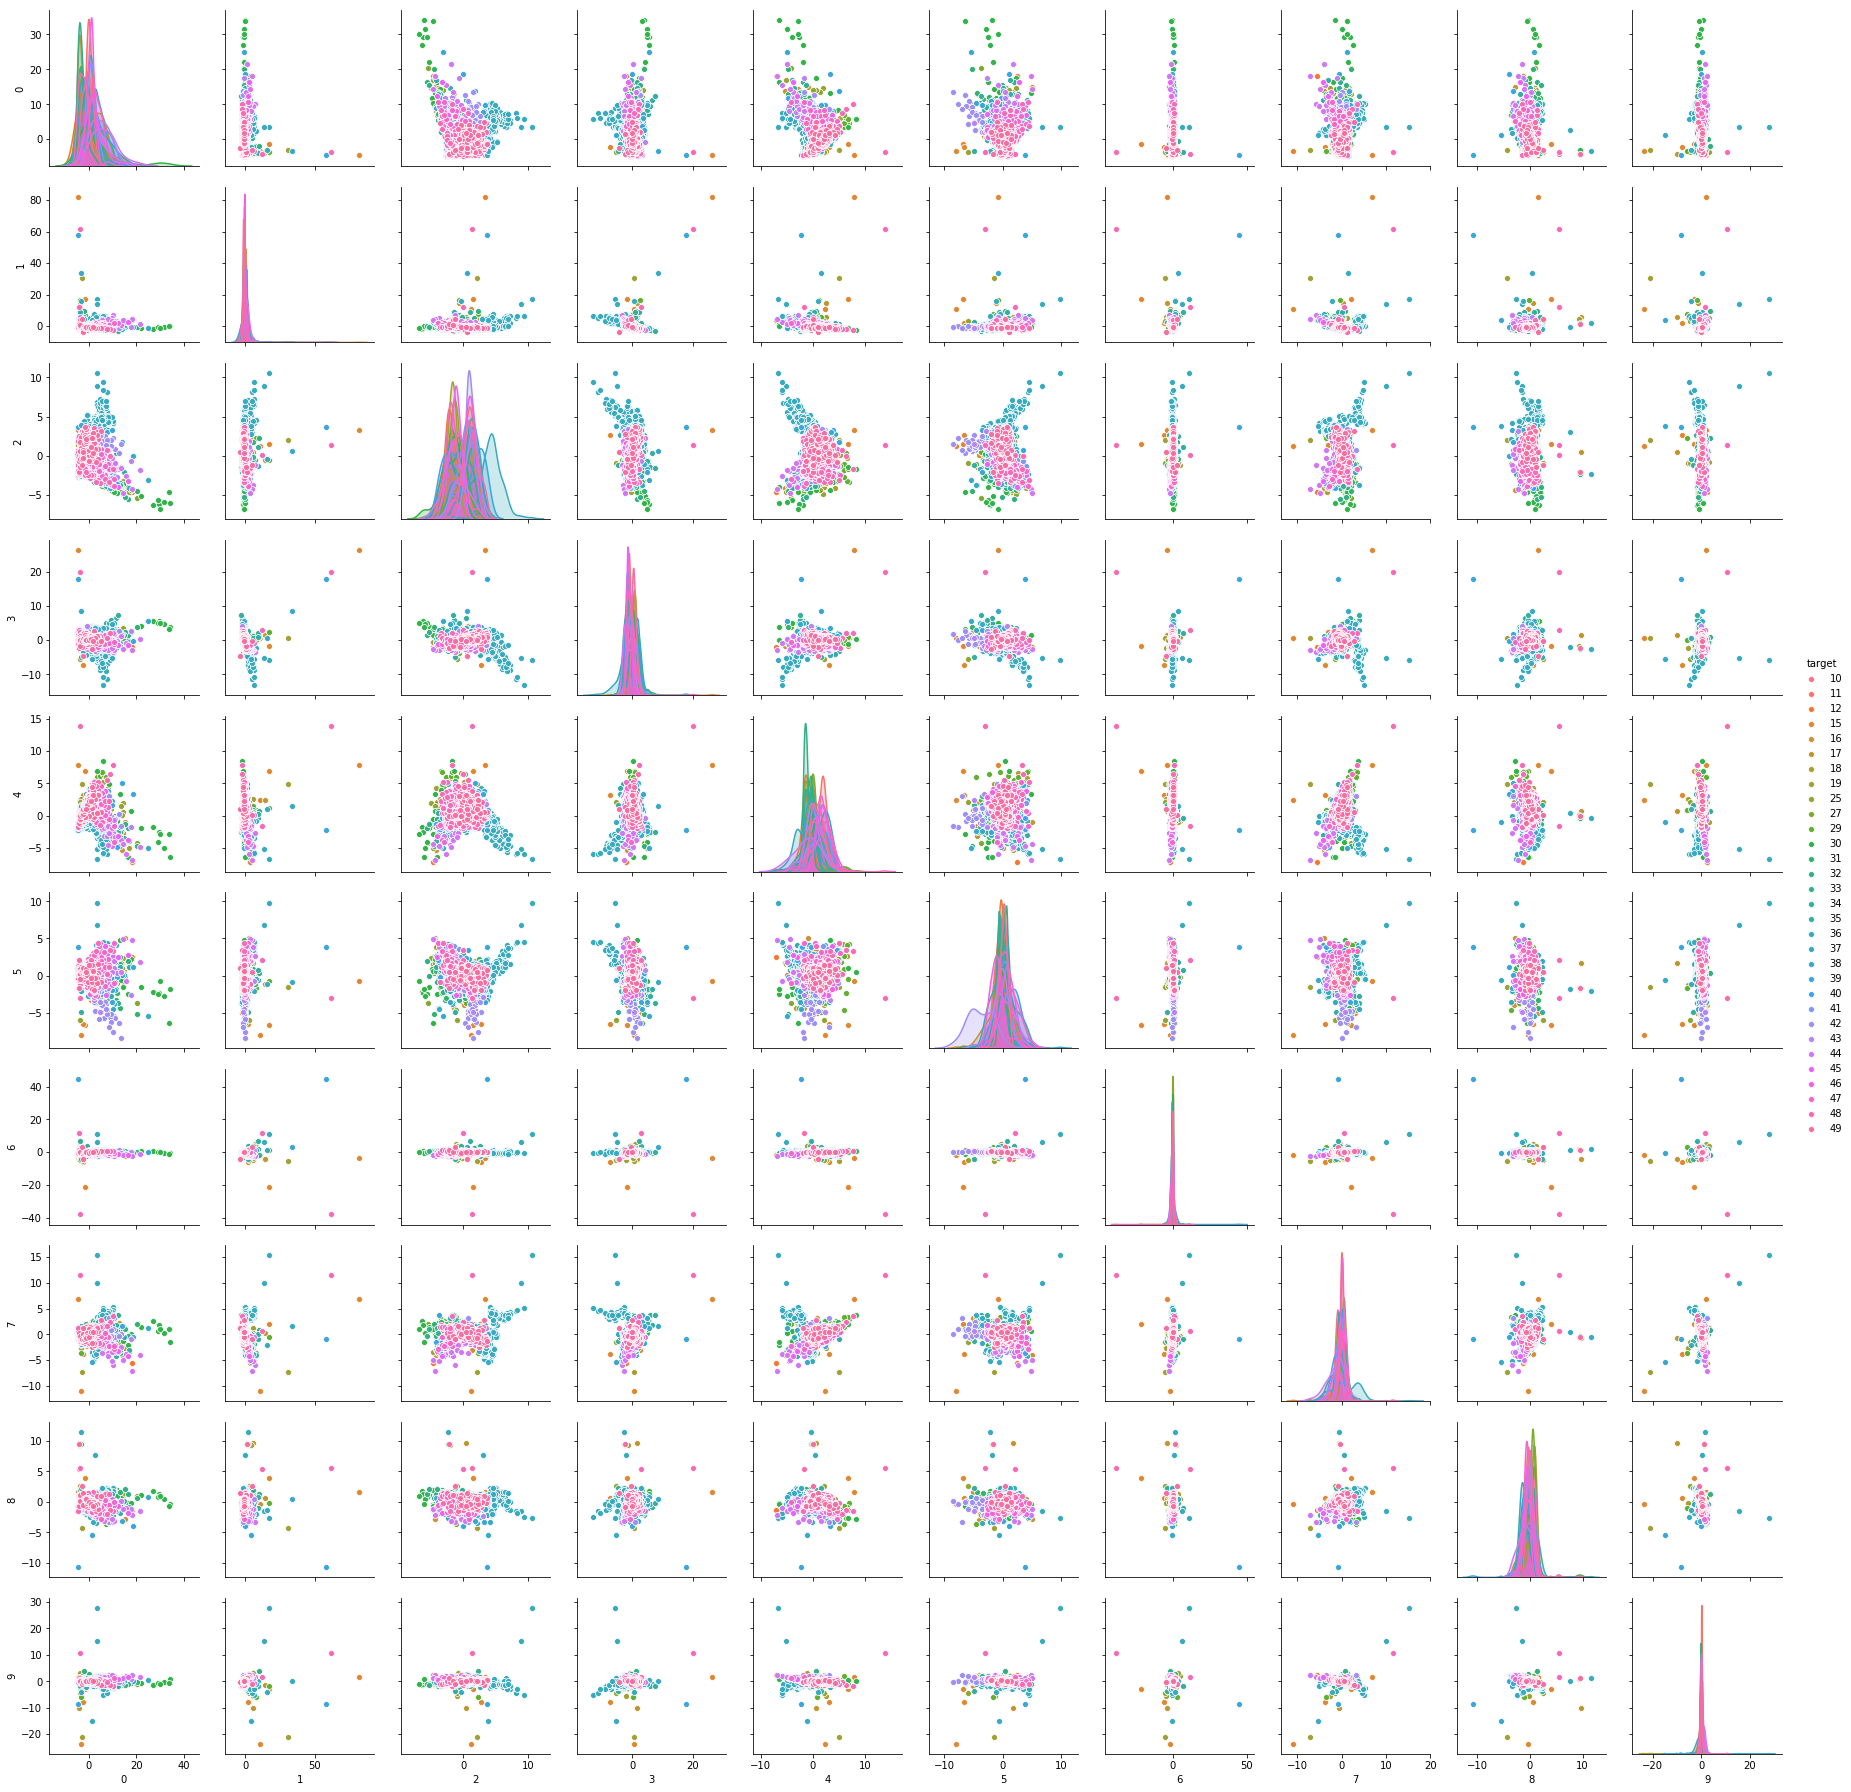

In [67]:
sns.pairplot(data=pca_X, hue='target', vars=pca_X.columns[:-1])

## Feature Select K Best

In [68]:
feat_select = SelectKBest(chi2, k=10)
feat_select.fit(np.abs(X),y)

SelectKBest(k=10, score_func=<function chi2 at 0x7f11b8cf9d90>)

In [69]:
idx_list = feat_select.get_support(indices=True)
print([columns[i+2] for i in idx_list])

['sband_mean', 'sband_noise', 'mfcc_5_noise', 'mfcc_6_std', 'mfcc_6_noise', 'mfcc_7_noise', 'mfcc_8_std', 'mfcc_8_mean', 'mfcc_8_noise', 'mfcc_9_std']


In [70]:
feat_X = pd.DataFrame(feat_select.transform(np.abs(X)), columns=[columns[i+2] for i in idx_list])

In [71]:
feat_X['target'] = list(y.astype(int))
feat_X.head()

sband_mean  sband_noise  mfcc_5_noise  mfcc_6_std  mfcc_6_noise  \
0    1.160879     0.213722      2.044420    0.371147      0.732044   
1    1.192151     0.415996      2.688777    0.596126      1.064353   
2    0.643766     0.106032      0.691998    1.205863      0.509064   
3    1.059823     0.045223      0.698218    0.394825      0.451929   
4    0.480029     0.088103      1.012143    1.429797      0.304186   

   mfcc_7_noise  mfcc_8_std  mfcc_8_mean  mfcc_8_noise  mfcc_9_std  target  
0      0.928358    0.281612     1.146803      2.260053    3.128479      36  
1      0.937399    0.494647     1.866798      2.912283    3.758750      36  
2      0.456860    0.658566     0.693385      0.781827    0.809014      19  
3      0.433666    0.458826     0.358244      0.467235    0.508124      19  
4      0.537046    0.657383     0.631459      0.727189    0.787906      19

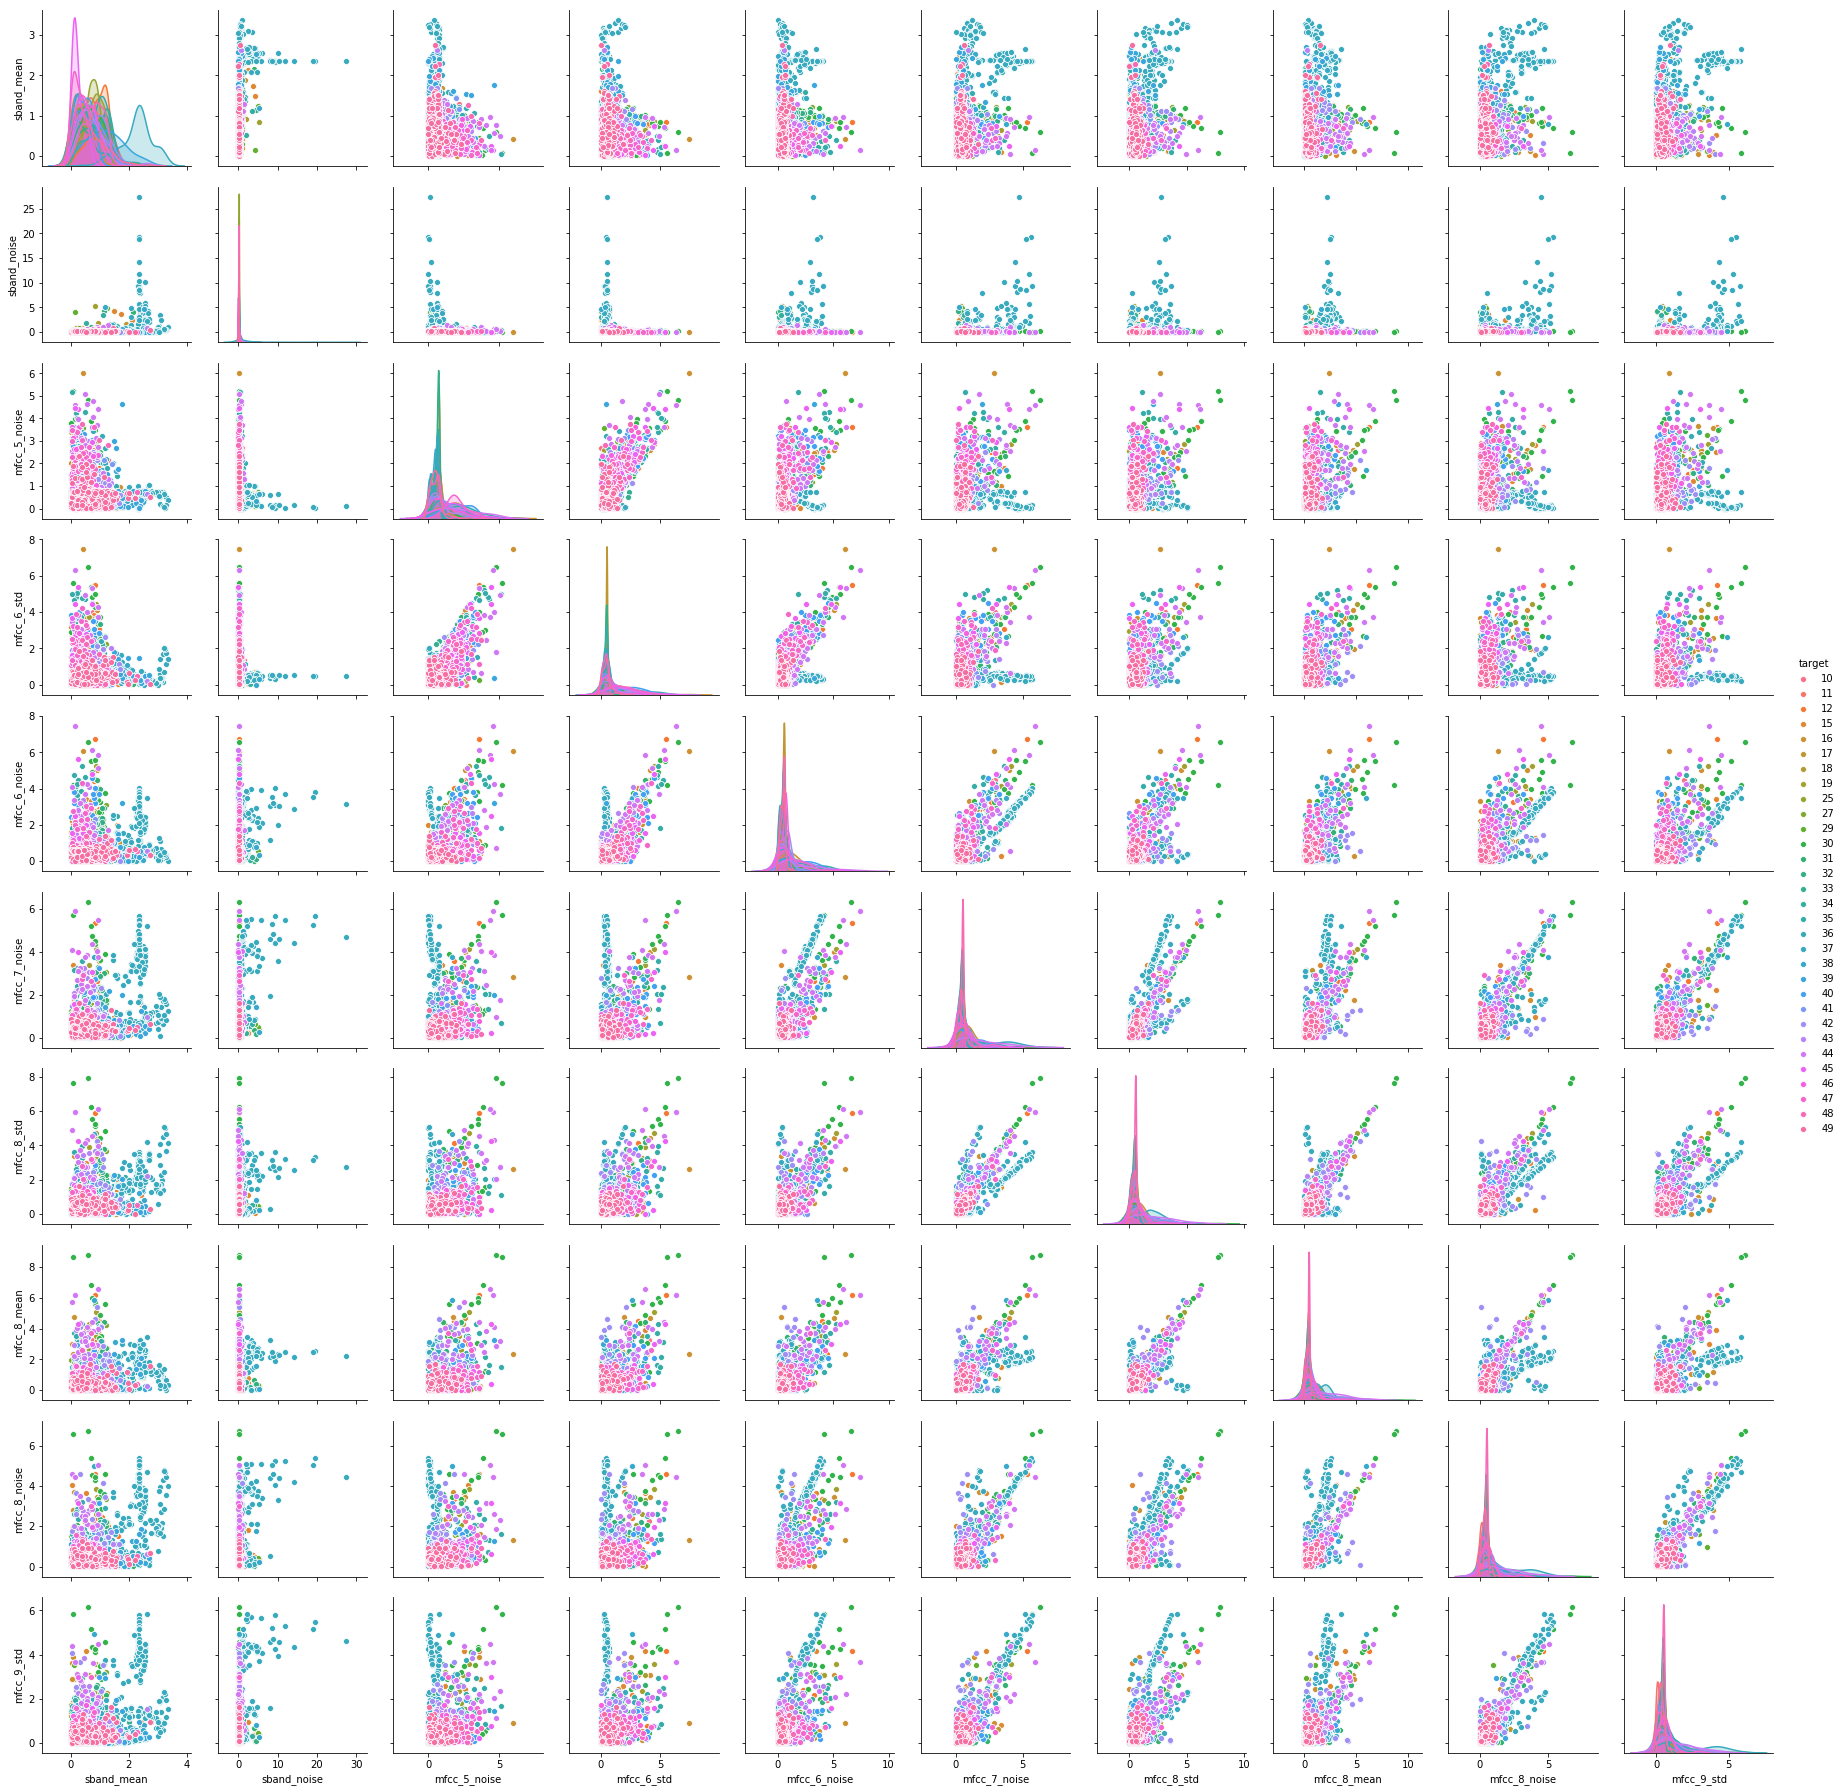

In [72]:
sns.pairplot(data=feat_X, hue='target', vars=feat_X.columns[:-1])

## LDA

In [73]:
lda = LinearDiscriminantAnalysis(n_components=5)
lda.fit(X,y=y)

LinearDiscriminantAnalysis(n_components=5, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [74]:
lda_X = pd.DataFrame(lda.transform(X))

In [75]:
lda_X['target'] = list(y.astype(int))
lda_X.head()

0         1         2         3         4  target
0 -0.367978  2.349480  0.780441 -1.702936 -0.055962      36
1 -0.756306  2.790372  0.832834 -2.019515 -0.340416      36
2 -1.007854  0.164616  1.030182  2.163851  1.477900      19
3 -0.924683 -0.404222  0.366695  0.689106  0.173191      19
4 -0.850213  0.924169  1.430534  1.627247  1.520320      19

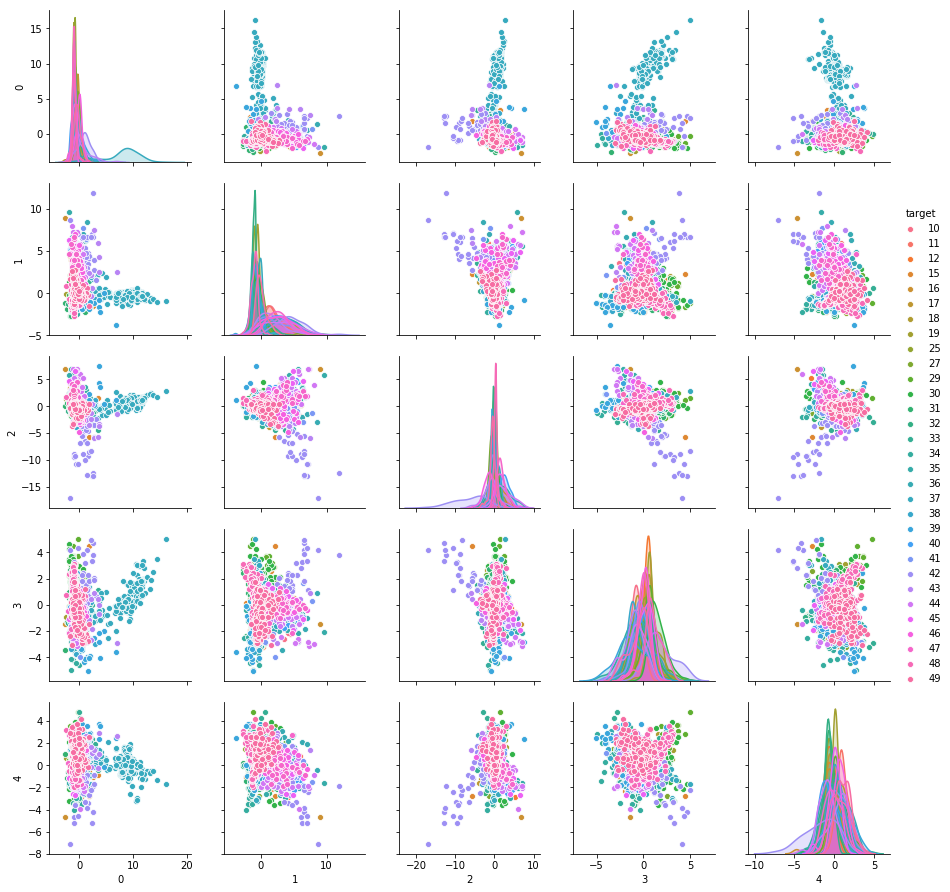

In [76]:
sns.pairplot(data=lda_X, hue='target', vars=lda_X.columns[:-1])